In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## PCA 실습

### 예제3. 이미지 압축

In [3]:
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [4]:
fruits[0].shape

(100, 100)

In [5]:
fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(100, 100), dtype=uint8)

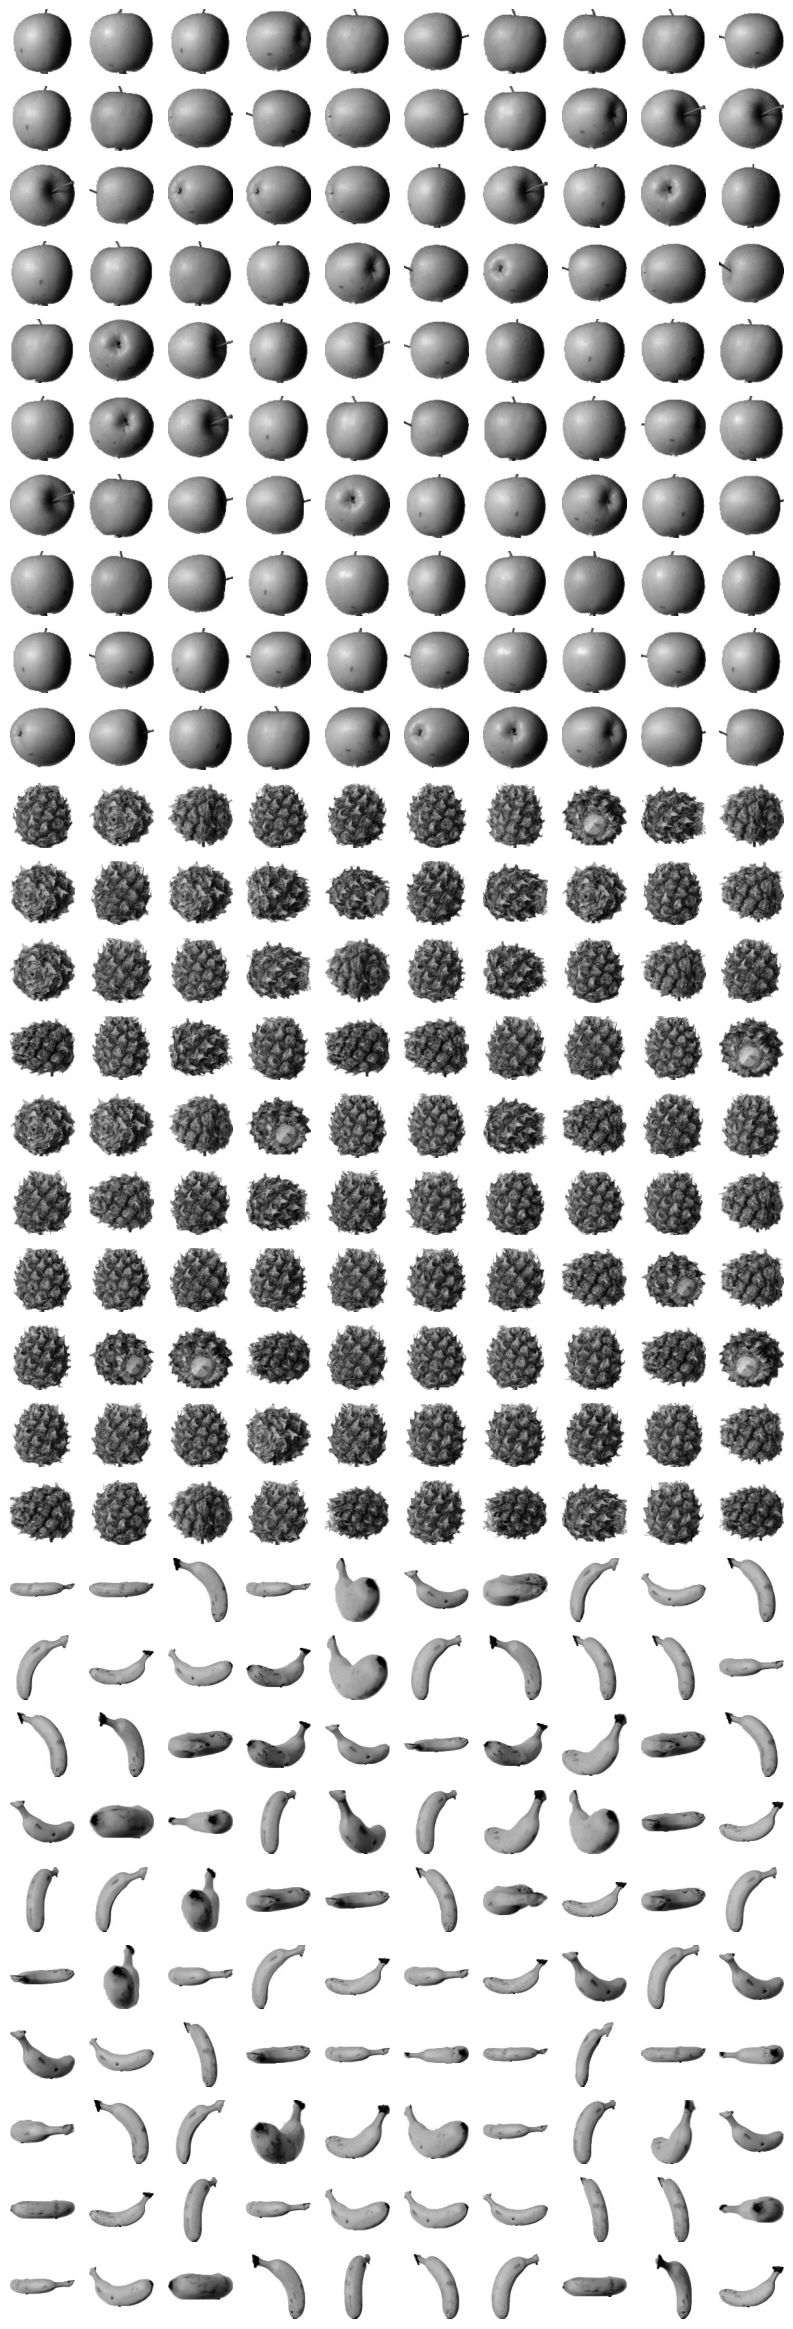

In [21]:
len = fruits.shape[0]
nr, nc = 30, 10
fig, axs = plt.subplots( nrows=nr, ncols=nc, figsize=(nc, nr))
for i in range(nr):
    for j in range(nc):
        axs[i][j].imshow(fruits[i * nc + j] ,cmap='gray_r')
        axs[i][j].axis('off')
plt.show()

- 이미지 출력

In [22]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [24]:
from sklearn.decomposition import PCA 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### PCA를 적용하여 분류 성능 예측/시각화

- RandomForestClassifier, LogisticRegression 두가지로 성능 확인
- n_components = 50

In [26]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [27]:
pca.components_.shape

(50, 10000)

In [28]:
pca.components_.shape

(50, 10000)

- 50개 주성분의 특징 시각화

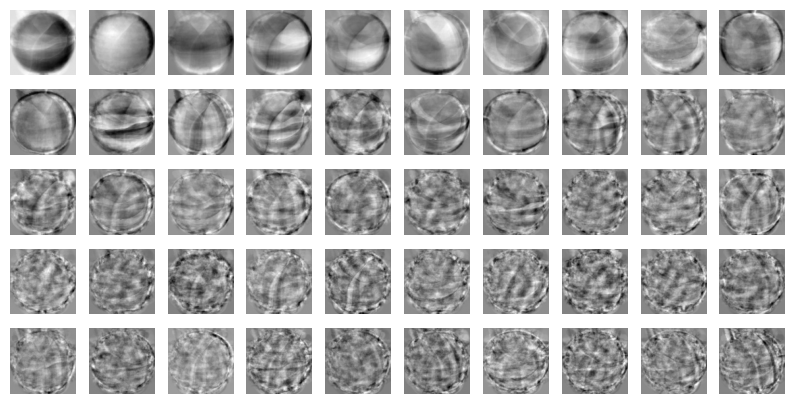

In [30]:
pca_comp = pca.components_.reshape(-1, 100, 100)
nr, nc = 5, 10
fig, axs =plt.subplots(nrows=nr, ncols=nc, figsize=(nc,nr))
for i in range(nr):
    for j in range(nc):
        axs[i][j].imshow(pca_comp[i*nc +j], cmap='gray_r')
        axs[i][j].axis('off')
plt.show()

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.42357017, 0.52298772, 0.58876636, 0.62907807, 0.66324682,
       0.69606011, 0.72179277, 0.7423424 , 0.75606517, 0.76949289,
       0.78101436, 0.79046031, 0.79924263, 0.8077096 , 0.8146401 ,
       0.82109198, 0.82688094, 0.83199296, 0.83685679, 0.84166027,
       0.84613863, 0.85051178, 0.85459216, 0.8584869 , 0.86221125,
       0.86580413, 0.86911881, 0.8722973 , 0.87534062, 0.8783783 ,
       0.88126771, 0.88402671, 0.88667689, 0.88923623, 0.89175803,
       0.89423216, 0.89662875, 0.8989361 , 0.90115851, 0.90332274,
       0.90546089, 0.90742767, 0.90936056, 0.9112701 , 0.91312096,
       0.91495067, 0.91668356, 0.91838002, 0.92000986, 0.92162464])

In [32]:
fruits_inv = pca.inverse_transform(fruits_pca)
fruits_inv.shape

(300, 10000)

- 50개 주성분이 설명하는 분산 비율

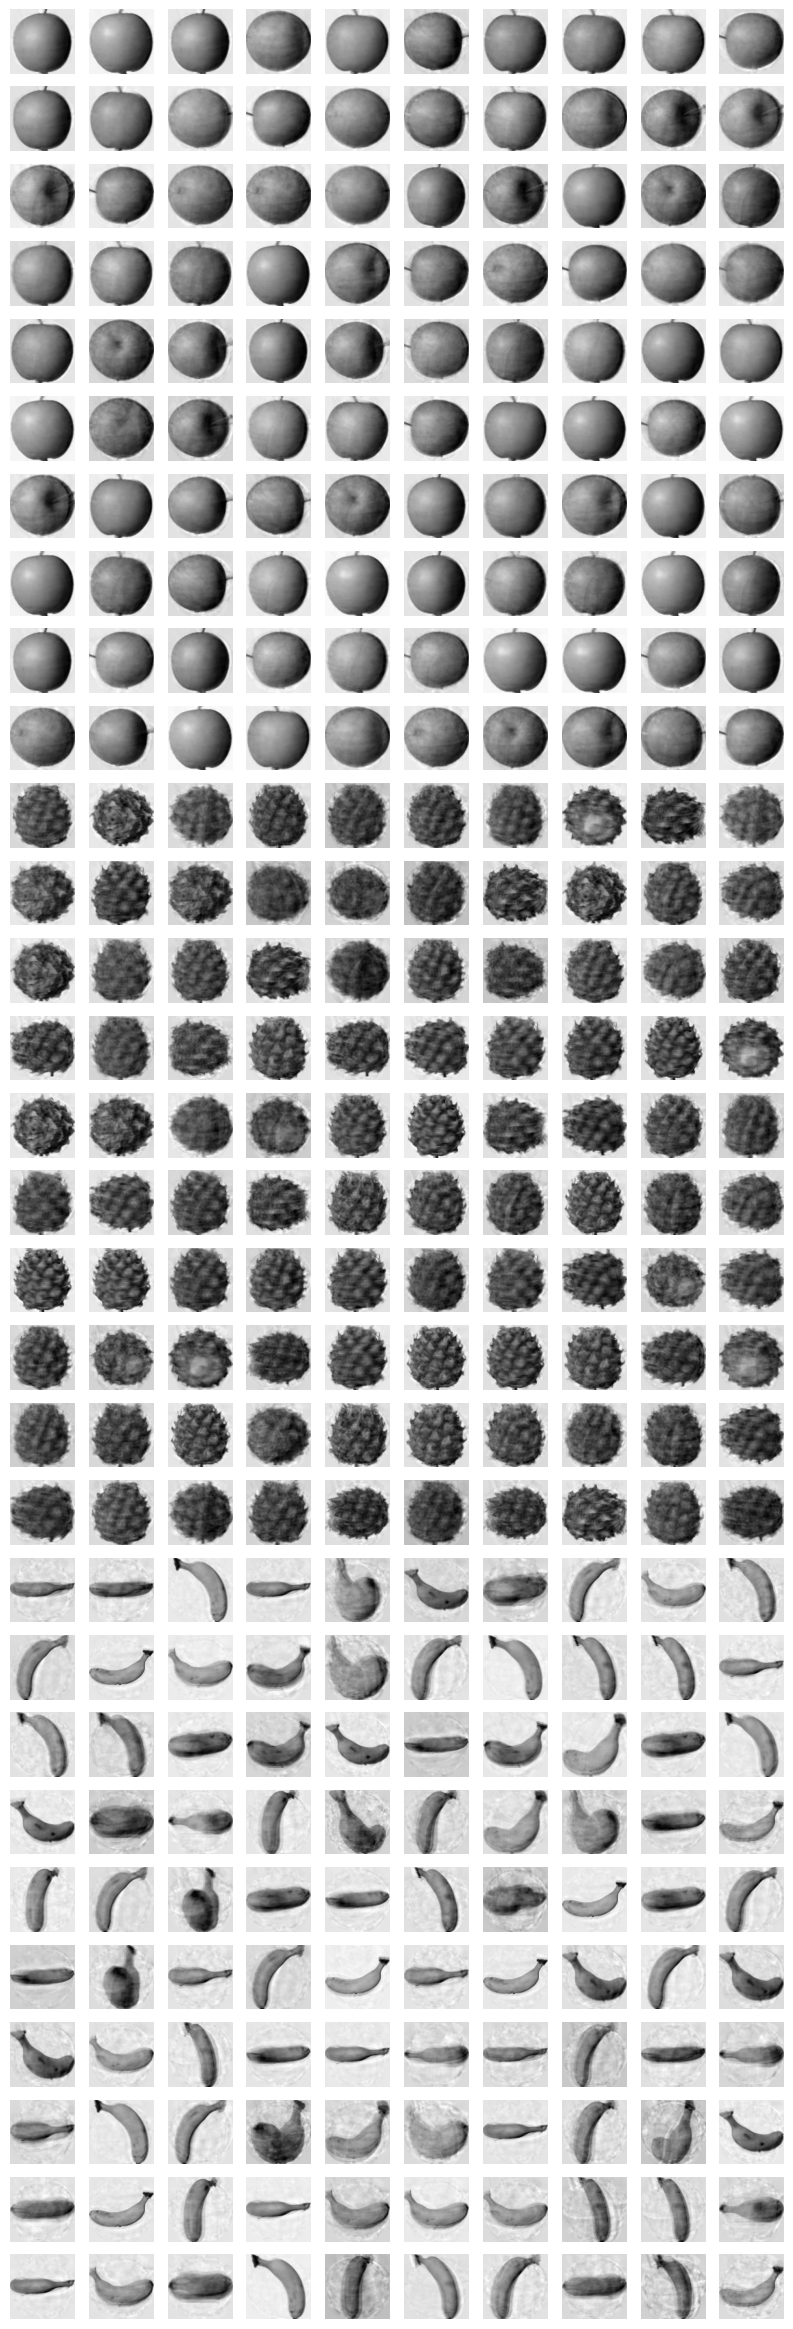

In [35]:
fruits_inv2 = fruits_inv.reshape(-1,100,100)
nr, nc = 30, 10
fig, axs =plt.subplots(nrows=nr, ncols=nc, figsize=(nc,nr))
for i in range(nr):
    for j in range(nc):
        axs[i][j].imshow(fruits_inv2[i*nc +j], cmap='gray_r')
        axs[i][j].axis('off')
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [37]:
y = np.array([0]*100 + [1]*100 + [2]*100)
y.shape

(300,)

In [42]:
rf = RandomForestClassifier(random_state=156)
lr = LogisticRegression()

scores = cross_val_score(rf, fruits_pca, y, cv=5, scoring='accuracy')
print('👍fruits PCA 변환 데이터에 대한 교차검증(cv=5)')
for model in [rf, lr]:
    scores = cross_val_score(model, fruits_pca, y, cv=5, scoring='accuracy')
    print(f'{model.__class__.__name__}')
    print(f'- 개별정확도: {np.round(scores,5)}')
    print(f'- 평균정확도: {np.mean(scores):.5f}')

👍fruits PCA 변환 데이터에 대한 교차검증(cv=5)
RandomForestClassifier
- 개별정확도: [1.      1.      1.      0.98333 1.     ]
- 평균정확도: 0.99667
LogisticRegression
- 개별정확도: [1.      1.      1.      0.98333 1.     ]
- 평균정확도: 0.99667


#### 원본 이미지로 재구성

- inverse_transform() 메서드

#### 원본데이터를 분류하고 성능예측

- RandomForestClassifier, LogisticRegression 두가지로 성능 확인

------